In [1]:
import matplotlib.pyplot as plt
import numpy as np

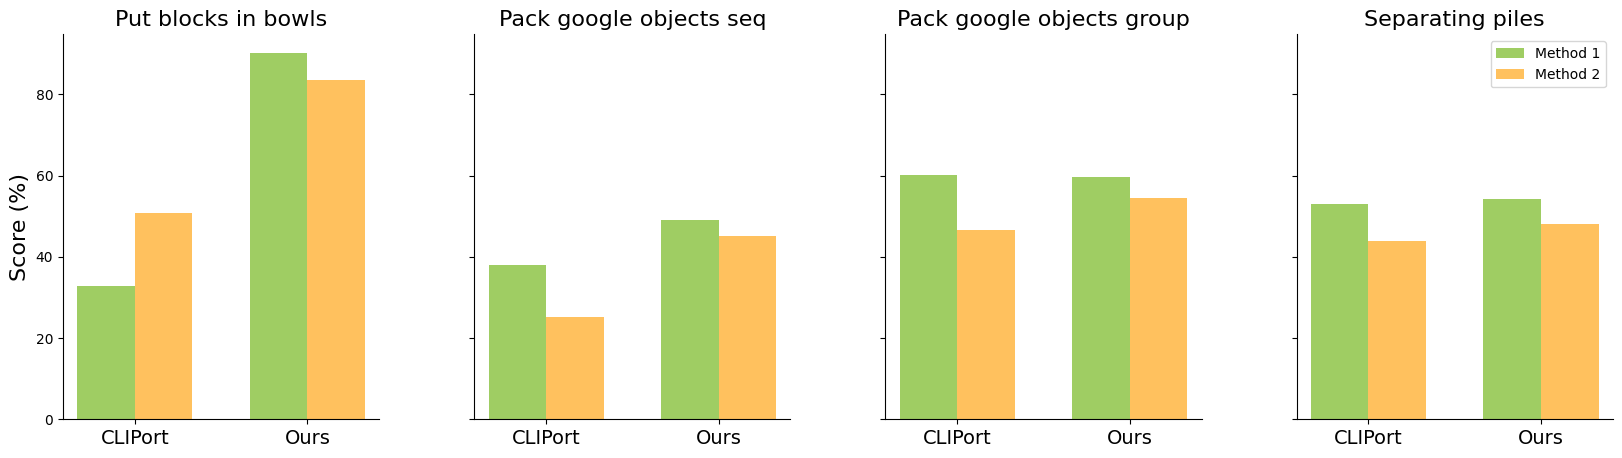

In [96]:
# task name
tasks = ["Put blocks in bowls", "Pack google objects seq", "Pack google objects group", "Separating piles"]

# data (4 group)
models = ['CLIPort', 'Ours']
Seen_scores_list = [
    np.array([32.7, 90.3]),
    np.array([37.9, 49.1]),
    np.array([60.2, 59.6]),
    np.array([53.1, 54.2])
]

Unseen_scores_list = [
    np.array([50.8, 83.6]),
    np.array([25.2, 45.2]),
    np.array([46.6, 54.6]),
    np.array([43.8, 48.2])
]

perception_color = '#9FCD63'  # Seen
physical_color = '#ffc15e'    # Unseen
arrow_color = 'red'           

fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

for i, ax in enumerate(axes):
    Seen_scores = Seen_scores_list[i]
    Unseen_scores = Unseen_scores_list[i]
    
    bar_width = 0.2
    index = np.linspace(0, 0.6, len(models)) 
    
    bars1 = ax.bar(index, Seen_scores, bar_width, label='Seen', color=perception_color)
    bars2 = ax.bar(index + bar_width, Unseen_scores, bar_width, label='Unseen', color=physical_color)
    
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(models, fontsize=14)
    
    ax.set_title(tasks[i], fontsize=16)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axes[0].set_ylabel('Score (%)', fontsize=16)

plt.subplots_adjust(wspace=0.3)

legend_labels = ['Method 1', 'Method 2', 'Method 3', 'Method 4']
ax.legend(legend_labels, loc='upper right')

plt.show()

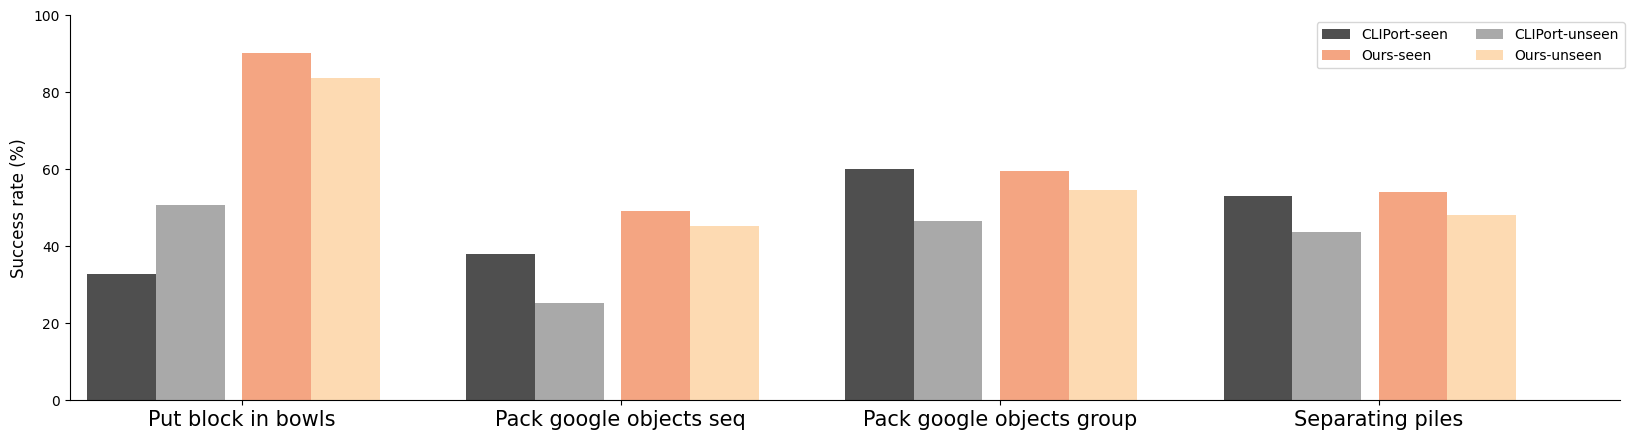

In [29]:
from matplotlib.patches import FancyArrowPatch
labels = ['Put block in bowls', 'Pack google objects seq', 'Pack google objects group', 'Separating piles']
num_groups = len(labels)
x_base = np.arange(num_groups)  

bar_width = 0.2  
index = np.linspace(0, 0.4, len(labels))
intra_group_spacing = 0.05  
inter_group_spacing = 0.1  
colors = ['#4F4F4F', '#F4A582','#A9A9A9',  '#FDDAB2'] 

data = np.array([
    [55.6, 93.3, 41.7, 92.6],
    [52.6, 49.1, 45.9, 50.2],
    [60.0, 60.3, 50.3, 57.3],
    [56.0, 54.6, 49.6, 51.2]
])

num_methods = data.shape[1]  
num_subgroups = 2  
num_bars_per_subgroup = num_methods // num_subgroups 

x = x_base * (1 + inter_group_spacing)

fig, ax = plt.subplots(figsize=(20, 5))

for i in range(num_methods):
    subgroup_index = i % num_subgroups  

    # subgroup_offset = (subgroup_index - (num_subgroups - 1) / 2) * (num_bars_per_subgroup * (bar_width + intra_group_spacing))
    # bar_offset = (i // num_subgroups - (num_bars_per_subgroup - 1) / 2) * (bar_width + intra_group_spacing)
    # total_offset = subgroup_offset + bar_offset
    if i % 2 == 1:
        subgroup_offset = (subgroup_index - (num_subgroups - 1) / 2) * (num_bars_per_subgroup * (bar_width + intra_group_spacing))
        bar_offset = (i // num_subgroups - (num_bars_per_subgroup - 1) / 2) * (bar_width)
        total_offset = subgroup_offset + bar_offset - intra_group_spacing
        ax.bar(x + total_offset, data[:, i], bar_width, color=colors[i])
    else:
        subgroup_offset = (subgroup_index - (num_subgroups - 1) / 2) * (num_bars_per_subgroup * (bar_width + intra_group_spacing))
        bar_offset = (i // num_subgroups - (num_bars_per_subgroup - 1) / 2) * (bar_width)
        total_offset = subgroup_offset + bar_offset 
        ax.bar(x + total_offset, data[:, i], bar_width, color=colors[i])
    # ax.set_xticks(index + bar_width / 2)
    # ax.set_xticklabels(labels, fontsize=10)
    
ax.set_xticks(x)
# ax.set_xticklabels(labels, ha='right')  
ax.set_xlim(-0.5,4.0)  
ax.set_xticklabels(labels, fontsize=15)

# arrowprops = dict(facecolor='black', edgecolor='black', linewidth=0.5)
# ax.add_patch(FancyArrowPatch((-0.5, 1.5), (-0.5, 1.8), **arrowprops)) 
# # y_arrow = FancyArrowPatch((-0.5, 0), (-0.5, 100), mutation_scale=20, color='black', arrowstyle='->')
# # ax.add_patch(y_arrow)
ax.set_ylabel('Success rate (%)', fontsize=12)
y_ticks = np.arange(0, 101, 20)  
ax.set_yticks(y_ticks) 


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

legend_labels = ['CLIPort-seen', 'Ours-seen','CLIPort-unseen', 'Ours-unseen']
ax.legend(legend_labels, loc='upper left', ncol=2, fontsize=10, bbox_to_anchor=(0.8, 1.0))

plt.show()


